In [1]:
from methods.ManiGPClassifier import ManiGPClassifier

In [2]:
from read_file import read_file

In [3]:
X, y, label_names = read_file('appendicitis.tsv')

In [4]:
X.head()

,0,1,2,3,4,5,6
0,-0.766284,-0.844828,-0.877095,-0.592292,-0.636620,0.019589,-0.713568
1,0.172414,-0.155172,0.094972,-0.141988,-0.061972,-0.011753,0.154774
2,-1.191571,-1.000000,-1.234637,-0.365112,-0.512676,-0.932419,-1.252261
3,-0.865900,-2.387931,-1.256983,-0.365112,-0.473239,-2.393732,-1.256281
4,-0.678161,0.232759,-0.571695,-0.141988,-0.264789,0.047013,-0.629146


In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
label_names

array(['At1', 'At2', 'At3', 'At4', 'At5', 'At6', 'At7'], dtype='<U3')

In [7]:
# Angles classifier
manigpclf = ManiGPClassifier(n_iter=100, fitness_function="angles",pop_size=100)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.75,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=None)

In [10]:
manigpclf.fit(X_train, y_train)

In [11]:
from operator import attrgetter
get_height = lambda tree : attrgetter('height')(tree)
str(manigpclf.model[0]), str(manigpclf.model[1]), get_height(manigpclf.model[0]), get_height(manigpclf.model[1])

('modulus(power(max(x3, x4), x0), x0)',
 'max(multiply(modulus(xor(x4, x0), min(x3, 0.0)), x1), bitxor(NOT(right(1.0, x1)), right(permute(1.0, x6), 0.0)))',
 3,
 4)

In [12]:
X_train_reduced = manigpclf.reduce(manigpclf.model, X_train)

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot(X, y): # 2 classes only
    if (len(X.shape) != 2 or X.shape[1] != 2):
        return
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.legend()

def plot3classes(X,y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], c='g', marker='d', alpha=0.33, label='2')
    plt.legend()

In [15]:
%matplotlib inline

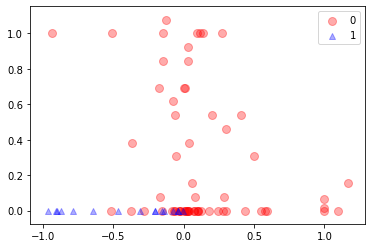

In [16]:
plot(X_train_reduced, y_train)

In [17]:
manigpclf.evaluate(manigpclf.model, X_train, y_train, manigpclf.random_state)

0.9206349206349207

In [18]:
#-------------------------------------------------

In [19]:
X_test_reduced = manigpclf.reduce(manigpclf.model, X_test)

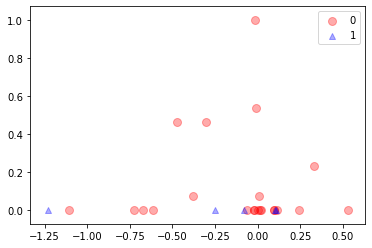

In [20]:
plot(X_test_reduced, y_test)

In [21]:
from utils.metrics import balanced_accuracy_score

In [22]:
balanced_accuracy_score(y_test, manigpclf.predict(X_test))

0.4090909090909091

In [23]:
manigpclf.rejected

5128

In [24]:
manigpclf.mut_count

9656

In [25]:
manigpclf.cx_count

509

In [18]:
X_train_reduced

array([[ 0.10045092,  0.        ],
       [-0.20495926,  0.        ],
       [-0.78717792,  0.        ],
       [ 0.43592654,  0.        ],
       [-0.90118975,  0.        ],
       [ 0.17791168,  0.        ],
       [ 0.07105955, -0.        ],
       [ 0.29983761,  0.        ],
       [-0.17985833,  0.69396552],
       [-0.13829986, -0.        ],
       [ 0.00852834,  0.69396552],
       [-0.51659206,  0.        ],
       [-0.03297483,  0.        ],
       [-0.37894764, -0.        ],
       [-0.14634359,  0.84482759],
       [ 0.10355958, -0.        ],
       [ 0.09163731,  0.        ],
       [-0.28313611,  0.        ],
       [ 1.        ,  0.01432119],
       [-0.93557424,  1.        ],
       [ 0.24356212, -0.        ],
       [-0.07213099,  0.        ],
       [-0.03873433,  0.        ],
       [ 0.01715618,  0.        ],
       [-0.08271817,  0.        ],
       [-0.06335688,  0.5387931 ],
       [-0.1290233 ,  1.07758621],
       [-0.15795843,  0.        ],
       [ 0.03044825,